# DATA ANALYTICS OF ELECTRIC VEHICLE TYPE (EVT)
# Trend Analysis
# Exploratory Data Analysis
# Correlation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
evp = pd.read_csv('C:\\Users\salig\Downloads\Electric_Vehicle_Population_Data.csv')

In [3]:
evp

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191402,5YJ3E1EA0K,Pierce,Sumner,WA,98390.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,31.0,314927896,POINT (-122.2337855 47.2055969),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191403,JN1BF0BA7P,Pierce,Wilkeson,WA,98396.0,2023,NISSAN,ARIYA,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,236213120,POINT (-122.0478543 47.1075591),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
191404,7SAYGDEE4R,King,Fall City,WA,98024.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,261335896,POINT (-121.903093 47.567116),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
191405,7SAXCBE65N,Grays Harbor,Aberdeen,WA,98520.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,219273491,POINT (-123.807422 46.978243),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10


In [4]:
evp.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS 

# 1. What is the most common Electric Vehicle Type?

In [5]:
most_common_ev_type = evp['Electric Vehicle Type'].value_counts().idxmax()
print(f"The most common Electric Vehicle Type is {most_common_ev_type}")

The most common Electric Vehicle Type is Battery Electric Vehicle (BEV)


# 2. How does the distribution of Electric Vehicle Types vary across different States?

In [6]:
ev_type_by_state = evp.groupby('State')['Electric Vehicle Type'].value_counts().unstack().fillna(0)
print(ev_type_by_state)

Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
State                                                   
AE                                                1.0   
AK                                                1.0   
AL                                                6.0   
AR                                                2.0   
AZ                                               10.0   
BC                                                2.0   
CA                                               77.0   
CO                                               11.0   
CT                                                2.0   
DC                                                3.0   
DE                                                1.0   
FL                                                6.0   
GA                                                5.0   
HI                                                5.0   
IA                                                1.0   
ID                             

# 3. Which City has the highest number of Electric Vehicles?

In [7]:
city_with_most_evs = evp['City'].value_counts().idxmax()
print(f"The city with the highest number of Electric Vehicles is {city_with_most_evs}")


The city with the highest number of Electric Vehicles is Seattle


# 4. What is the average Electric Range of EVs in each State?

In [8]:
avg_electric_range_by_state = evp.groupby('State')['Electric Range'].mean()
print(avg_electric_range_by_state)

State
AE    249.000000
AK      0.000000
AL     74.000000
AR    236.000000
AZ     53.153846
BC    157.666667
CA     46.336449
CO     48.000000
CT     69.428571
DC    122.000000
DE      0.000000
FL     91.111111
GA     95.666667
HI     97.000000
IA    249.000000
ID      4.750000
IL     74.071429
IN     88.000000
KS      4.666667
KY     11.000000
LA    131.250000
MA      0.000000
MD     52.093750
MI     24.000000
MN    220.000000
MO    122.600000
MT    330.000000
NC     23.600000
NE     16.500000
NH    308.000000
NJ     39.750000
NM     25.000000
NV    158.222222
NY    101.625000
OH     63.500000
OK      0.000000
OR     96.428571
PA     13.666667
RI     53.000000
SC     14.714286
TX    125.080000
UT    118.666667
VA     68.264151
WA     55.629908
WI    220.000000
WY      0.000000
Name: Electric Range, dtype: float64


# 5. Are there specific Models that have a higher Electric Range compared to others?

In [10]:
avg_range_by_model = evp.groupby('Model')['Electric Range'].mean().sort_values(ascending=False)
print(avg_range_by_model)


Model
KONA                258.000000
ROADSTER            234.062500
I-PACE              204.000000
MODEL S             173.948024
BOLT EV             172.243017
                       ...    
I7                    0.000000
I5                    0.000000
I4                    0.000000
HUMMER EV PICKUP      0.000000
ZDX                   0.000000
Name: Electric Range, Length: 147, dtype: float64


# 6. What type of vehicle model mostly with a Electric Range?

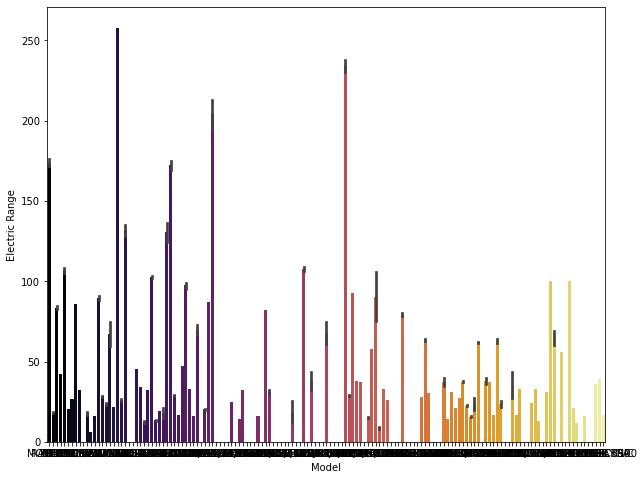

In [12]:
visual = sns.barplot(data=evp, x = "Model", y = "Electric Range", palette="inferno")
plt.gcf().set_size_inches(10 ,8)
plt.show()

# TREND ANALYSIS

# 7.  Most Common Electric Vehicle Type Over Time?

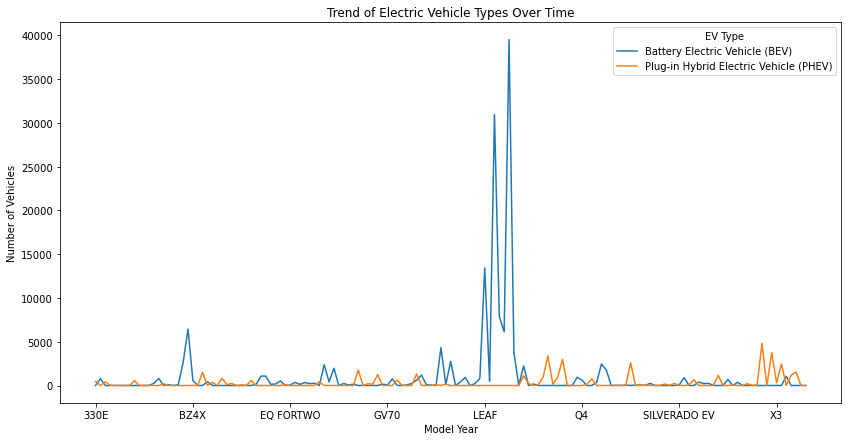

In [14]:
ev_type_trend = evp.groupby(['Model', 'Electric Vehicle Type']).size().unstack().fillna(0)
ev_type_trend.plot(kind='line', figsize=(14, 7))
plt.title('Trend of Electric Vehicle Types Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='EV Type')
plt.show()


# 8. Top 5 States with the Highest Number of EVs Over Time?

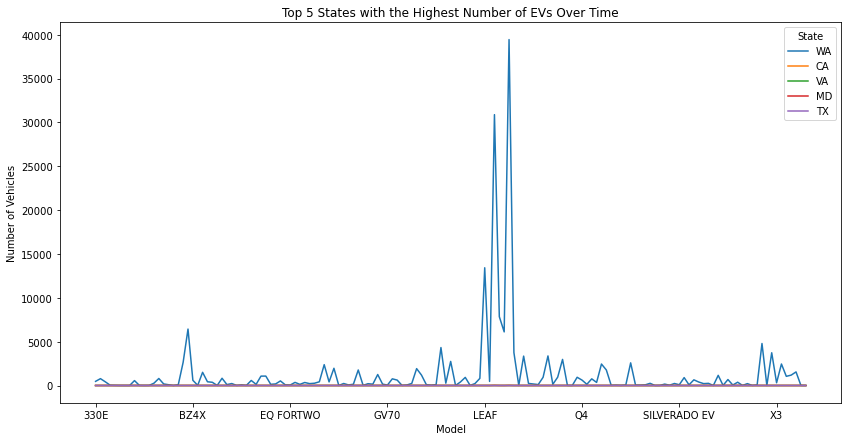

In [30]:
top_5_states_trend = evp.groupby(['Model', 'State']).size().unstack().fillna(0)
top_5_states = top_5_states_trend.sum().sort_values(ascending=False).head(5).index
top_5_states_trend[top_5_states].plot(kind='line', figsize=(14, 7))
plt.title('Top 5 States with the Highest Number of EVs Over Time')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.legend(title='State')
plt.show()


# 9. Prevalence of Models in Specific Cities or Postal Codes Over Time?

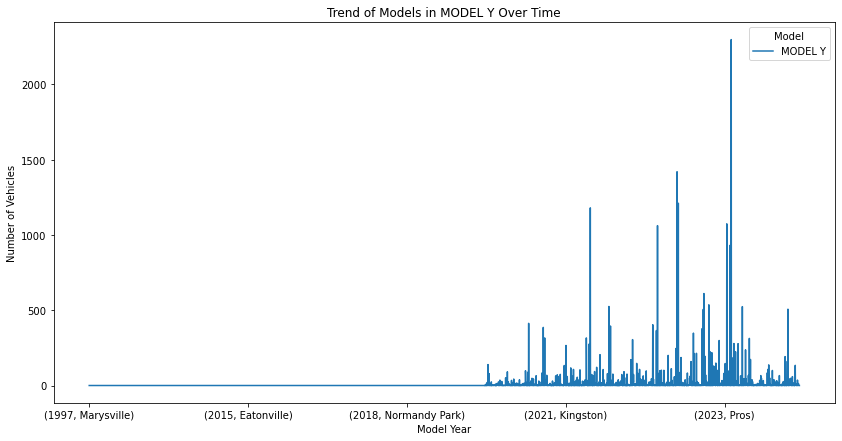

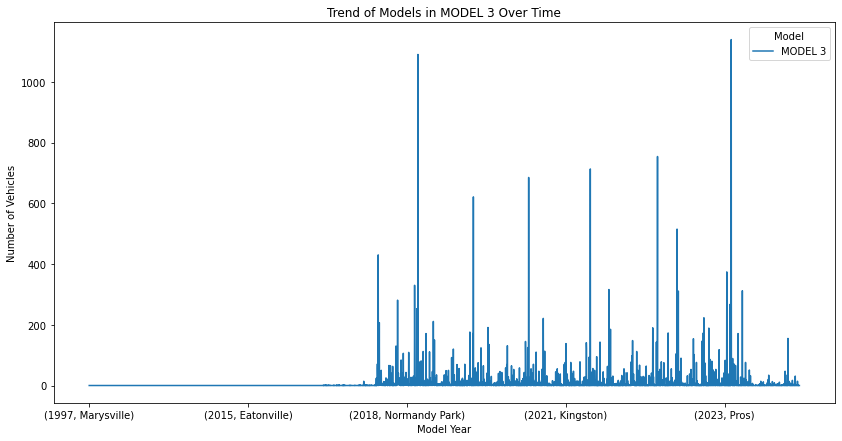

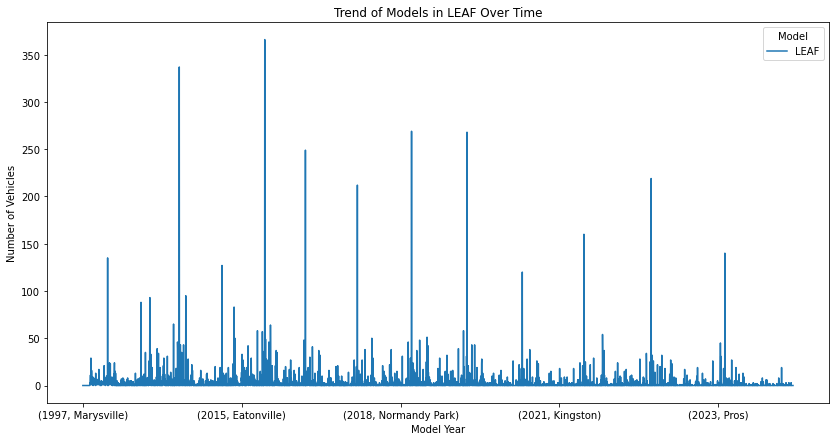

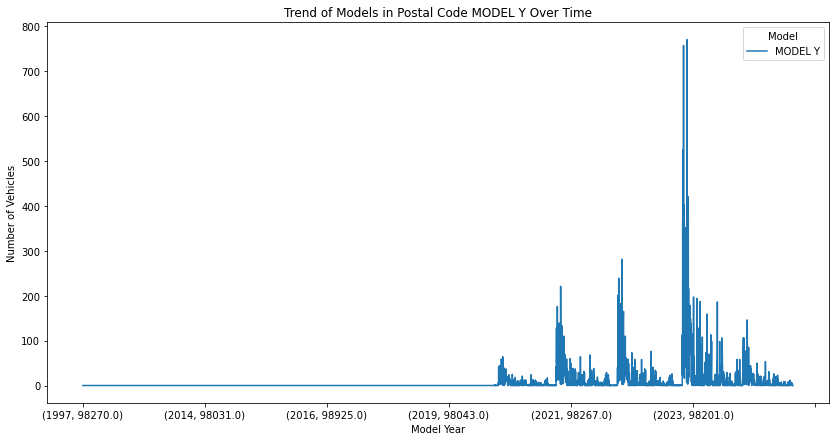

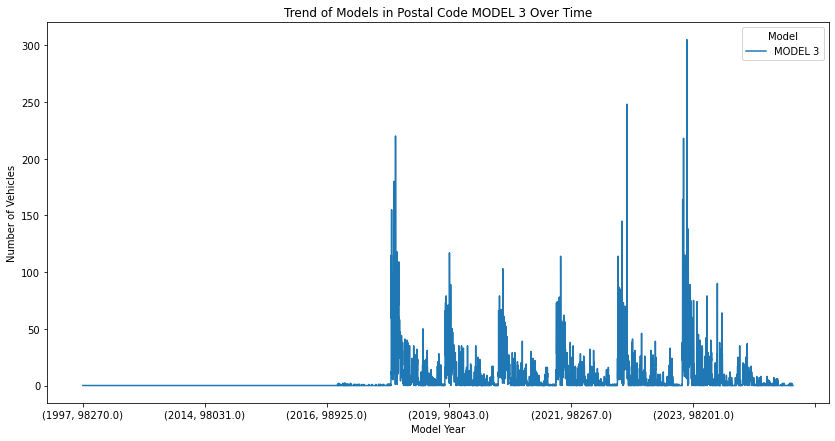

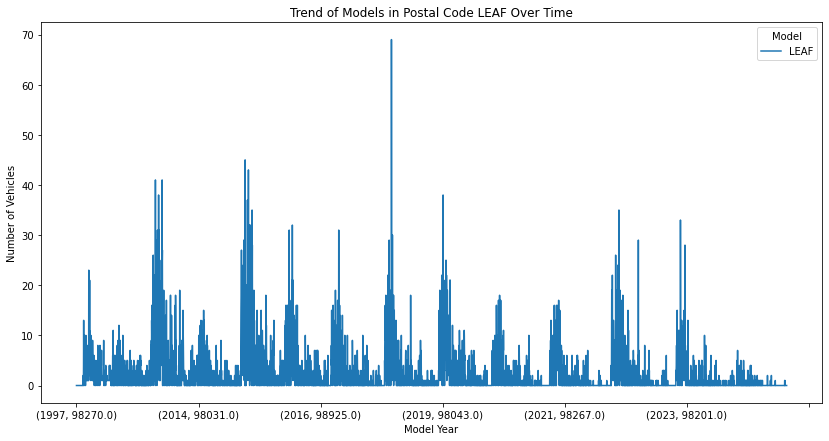

In [26]:
models_by_city_trend = evp.groupby(['Model Year', 'City', 'Model']).size().unstack().fillna(0)
top_cities = models_by_city_trend.sum().sort_values(ascending=False).head(3).index
for city in top_cities:
    models_by_city_trend[city].plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Models in {city} Over Time')
    plt.xlabel('Model Year')
    plt.ylabel('Number of Vehicles')
    plt.legend(title='Model')
    plt.show()

models_by_postal_code_trend = evp.groupby(['Model Year', 'Postal Code', 'Model']).size().unstack().fillna(0)
top_postal_codes = models_by_postal_code_trend.sum().sort_values(ascending=False).head(3).index
for postal_code in top_postal_codes:
    models_by_postal_code_trend[postal_code].plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Models in Postal Code {postal_code} Over Time')
    plt.xlabel('Model Year')
    plt.ylabel('Number of Vehicles')
    plt.legend(title='Model')
    plt.show()


# 10. Distribution of EV Types in Top 3 States Over Time?

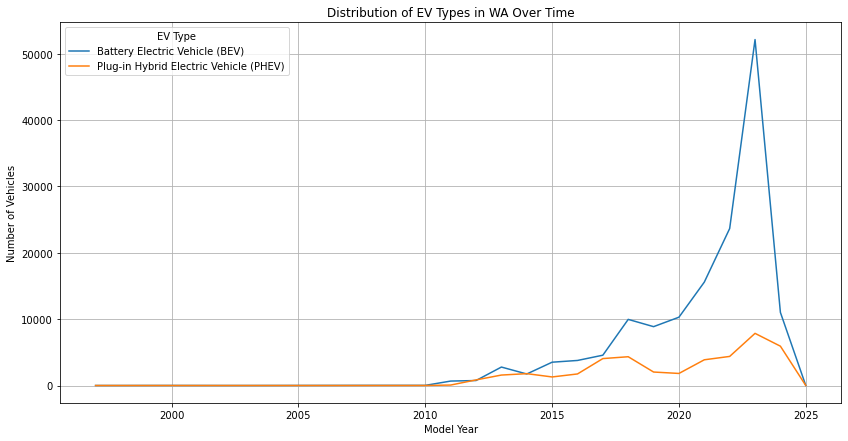

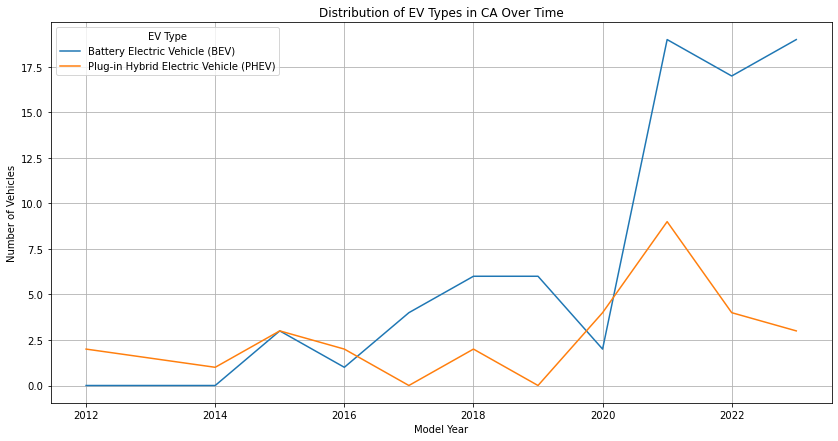

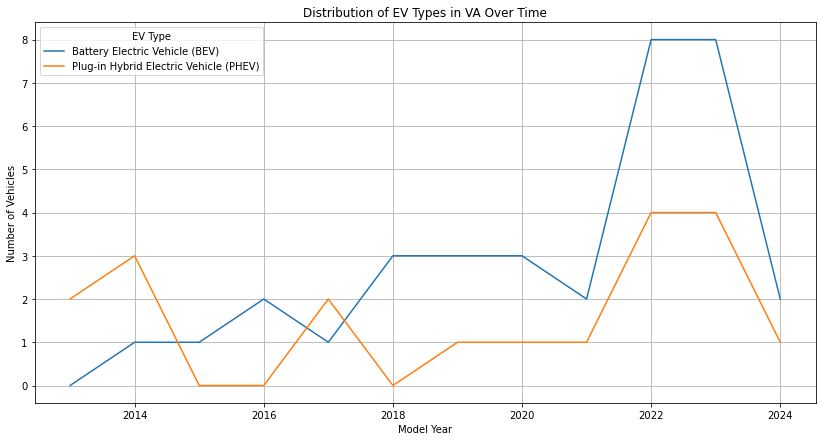

In [32]:
top_3_states = evp['State'].value_counts().head(3).index
for state in top_3_states:
    ev_type_distribution_top_state = evp[evp['State'] == state].groupby(['Model Year', 'Electric Vehicle Type']).size().unstack().fillna(0)
    ev_type_distribution_top_state.plot(kind='line', figsize=(14, 7))
    plt.title(f'Distribution of EV Types in {state} Over Time')
    plt.xlabel('Model Year')
    plt.ylabel('Number of Vehicles')
    plt.legend(title='EV Type')
    plt.grid(True)
    plt.show()


# 11. Distribution of Electric Vehicle Types by State Over Time?

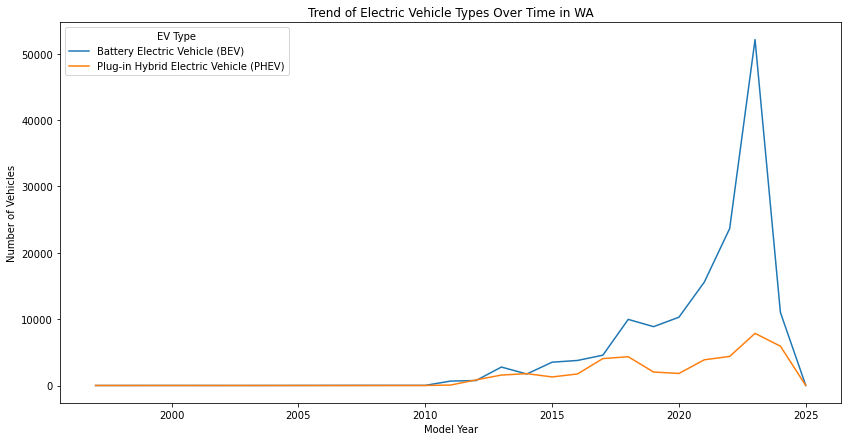

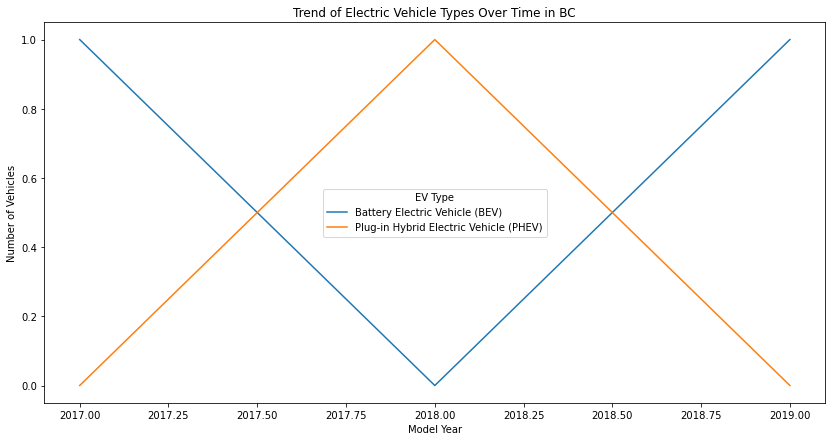

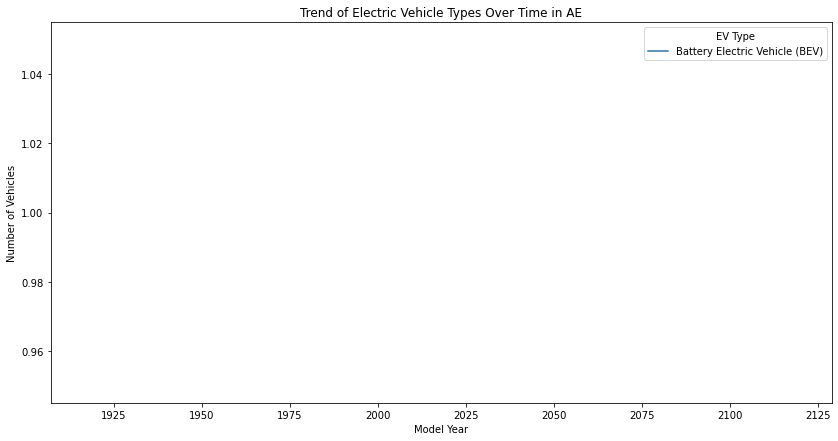

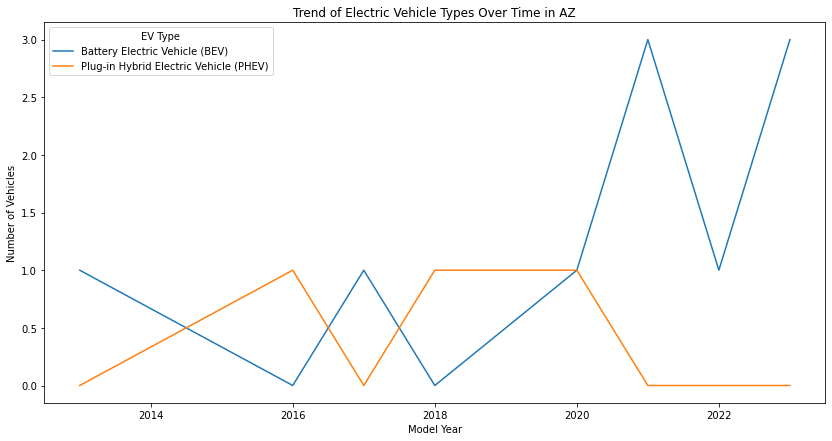

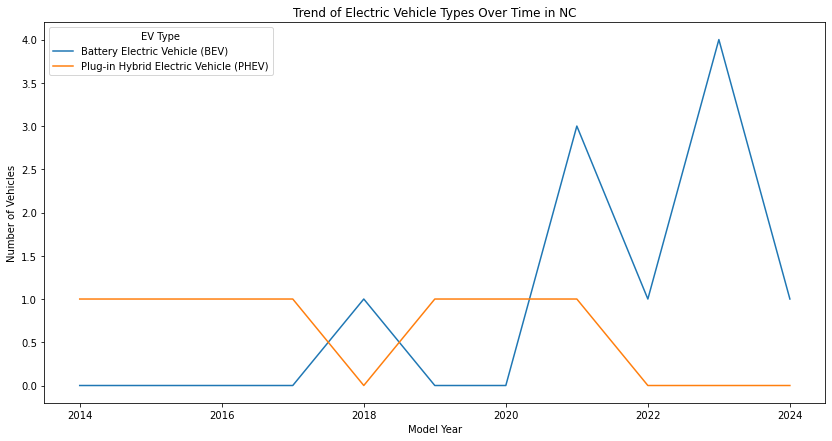

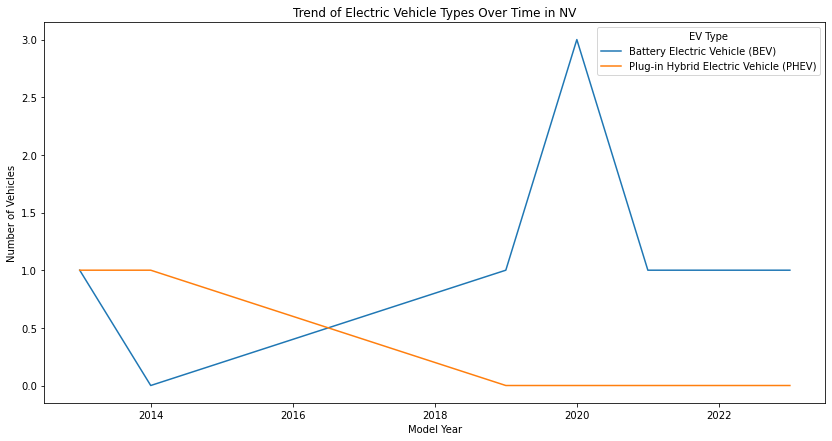

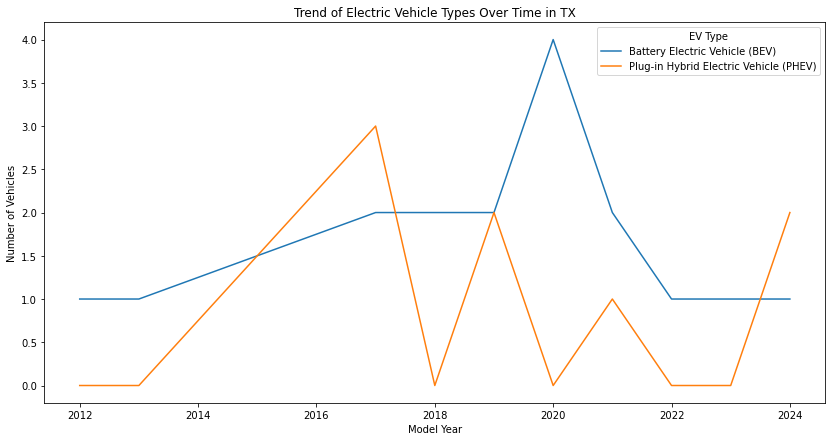

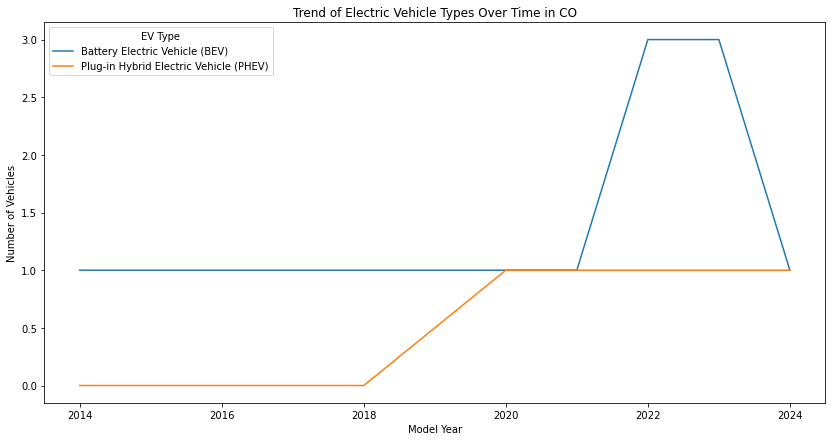

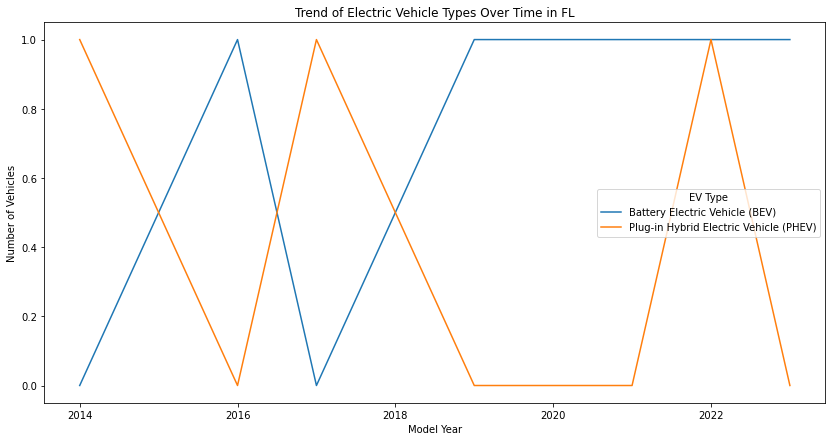

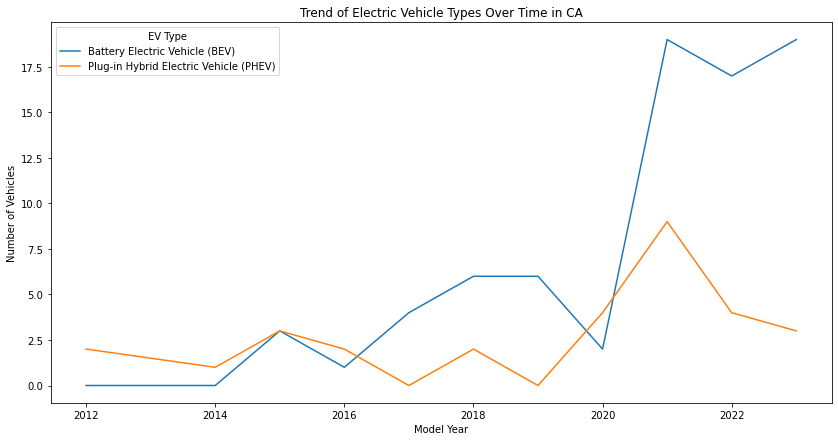

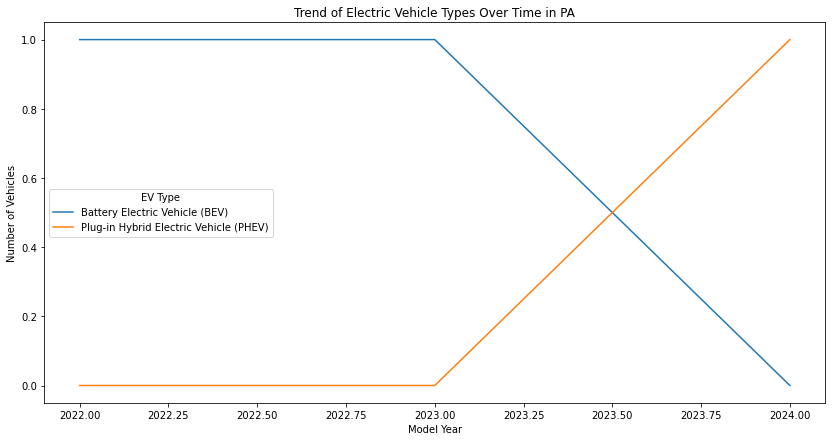

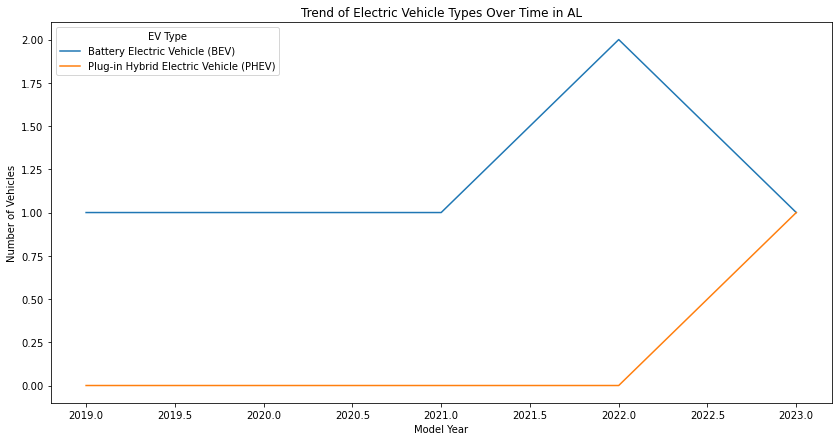

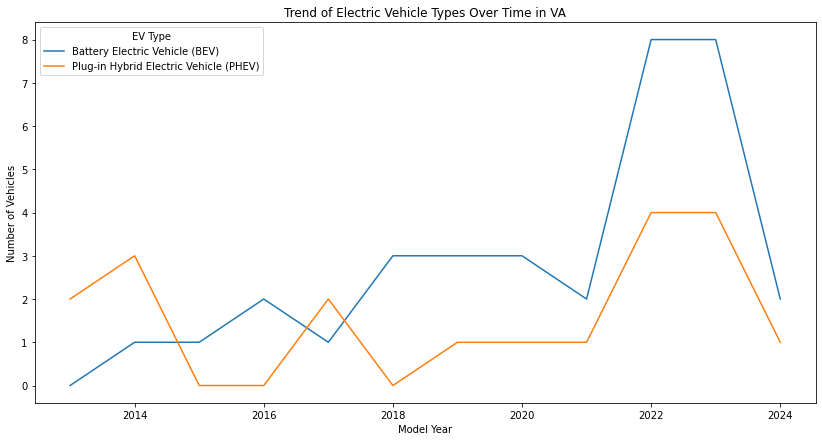

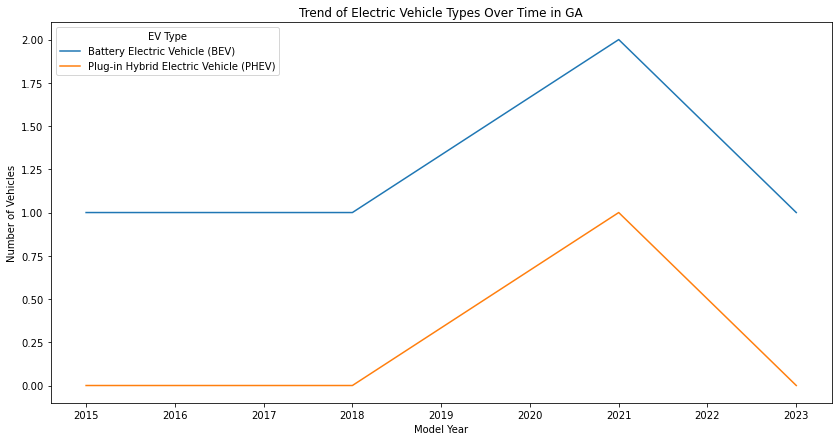

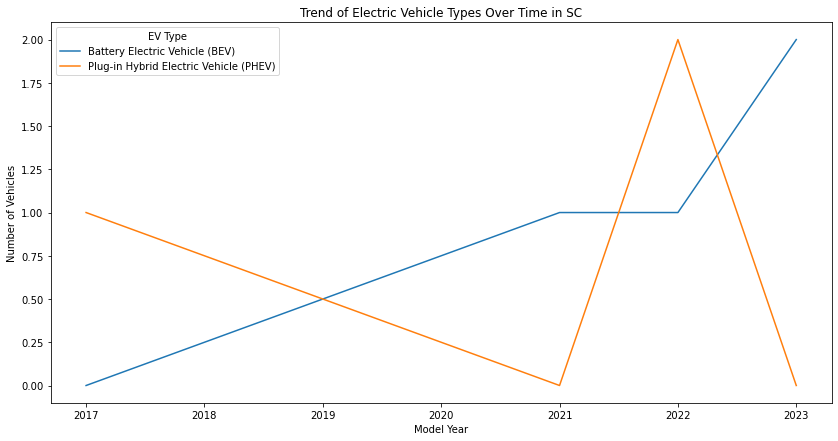

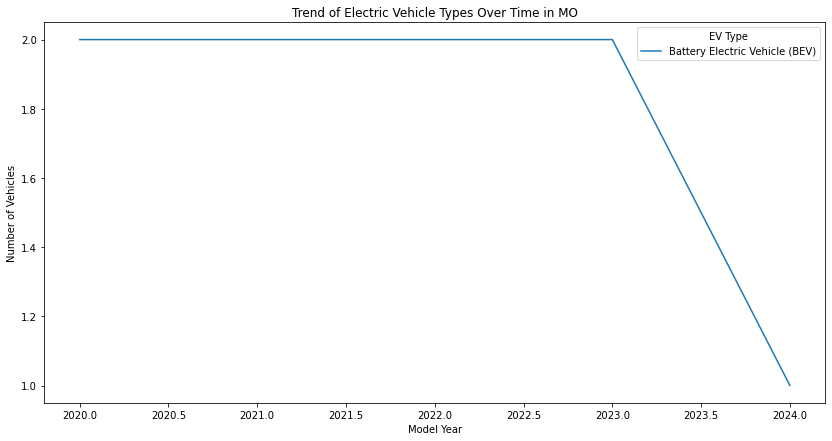

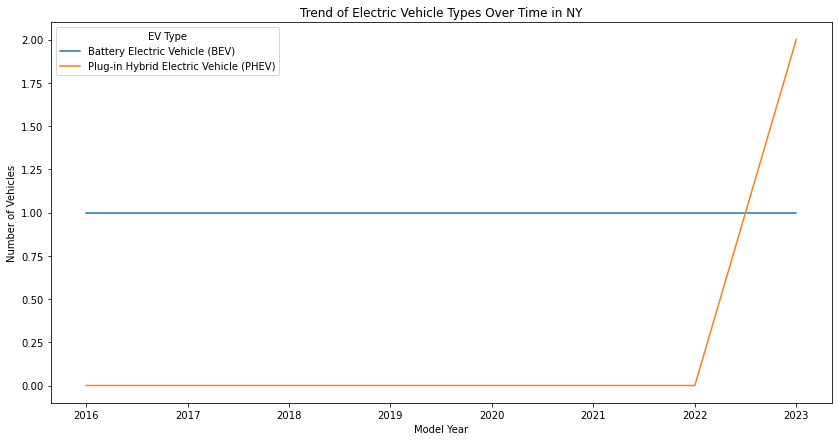

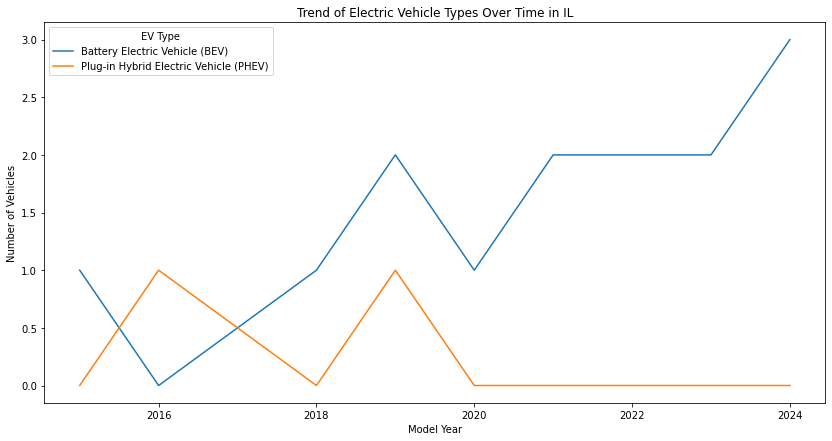

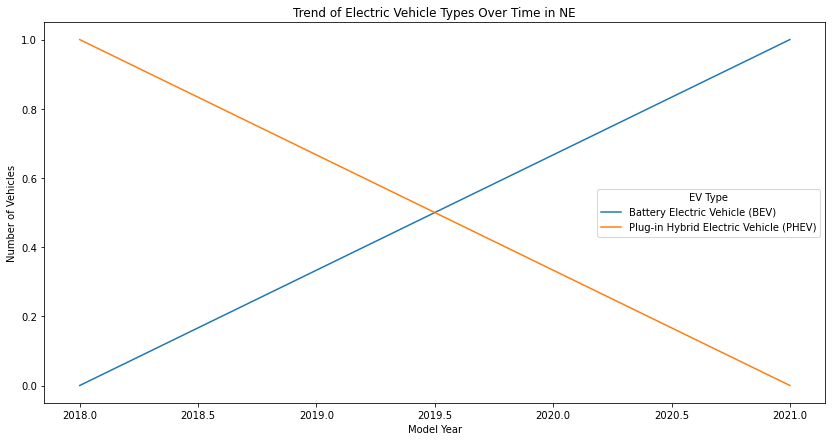

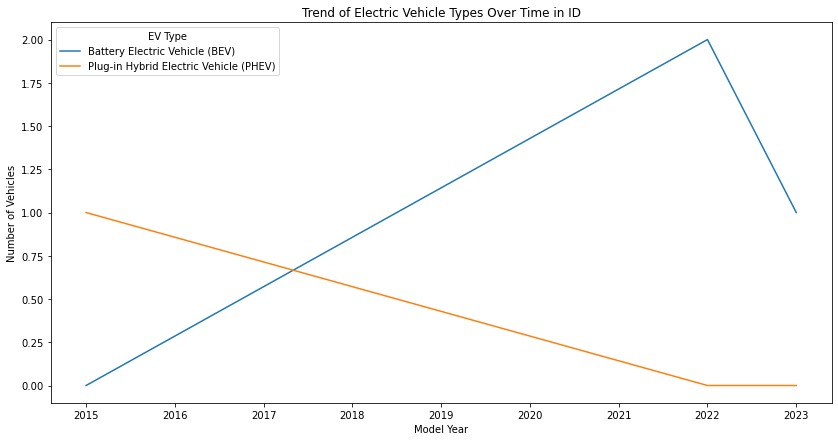

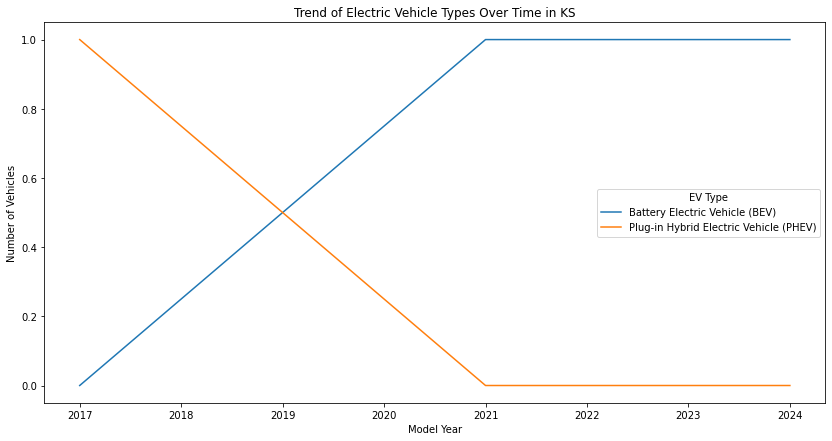

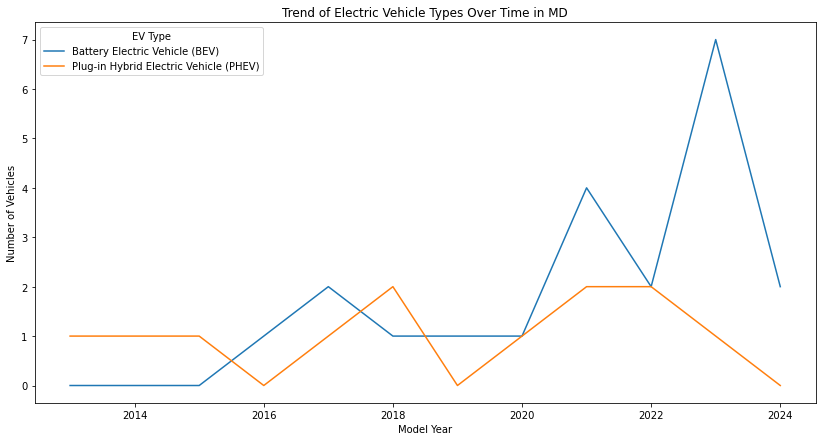

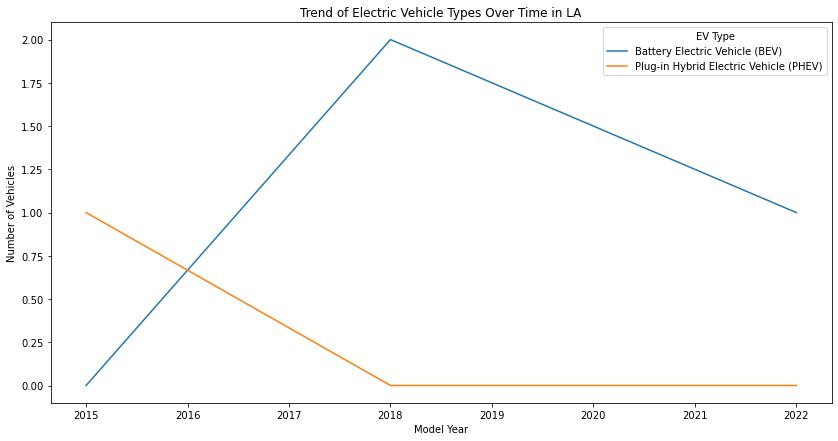

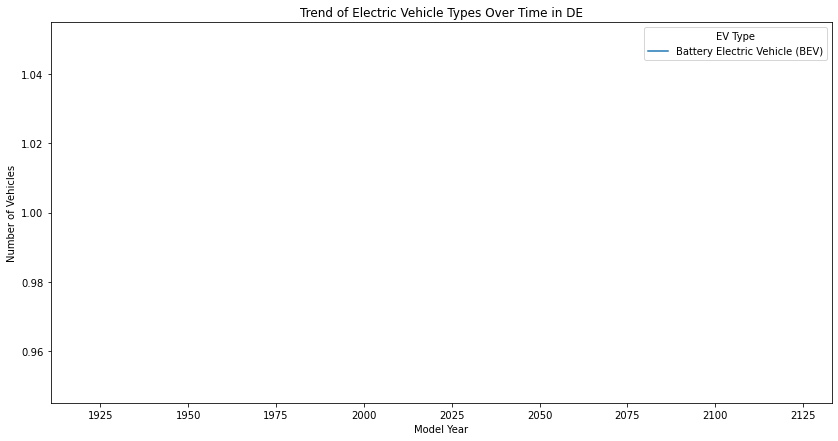

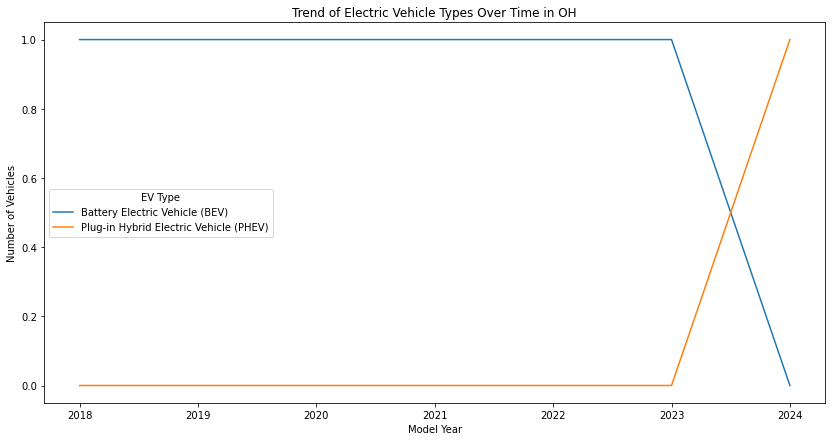

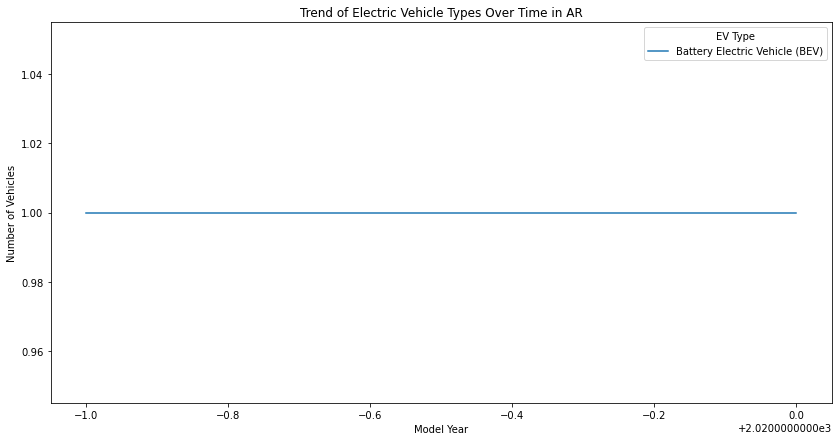

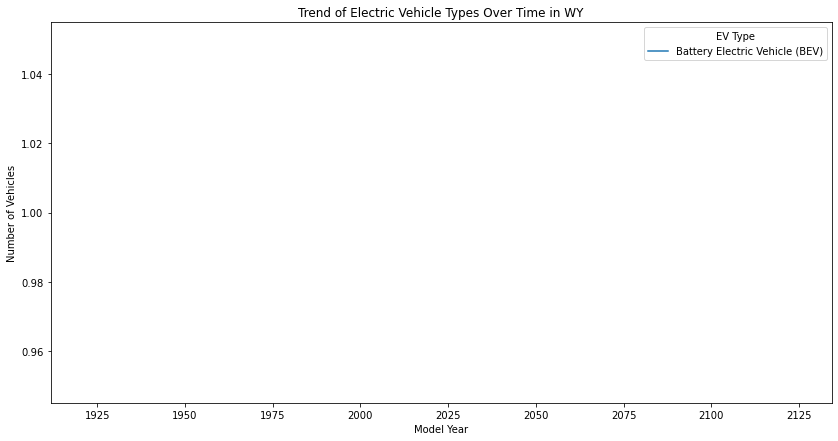

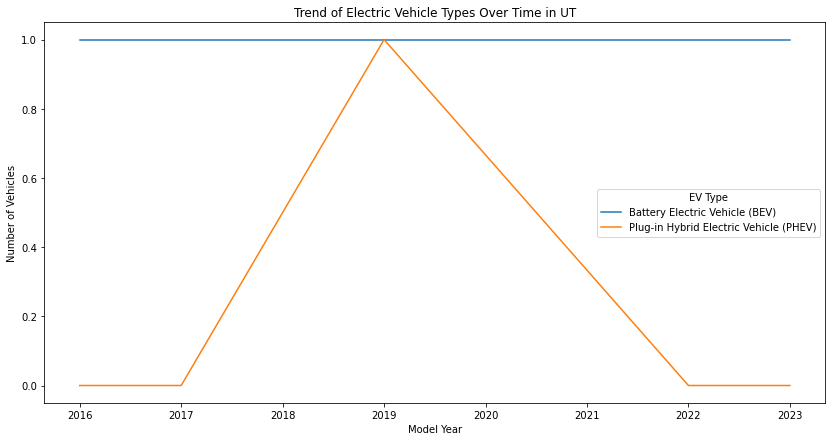

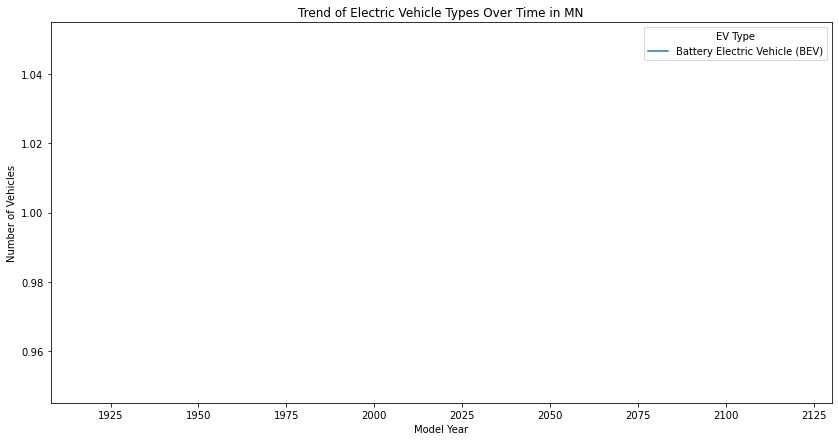

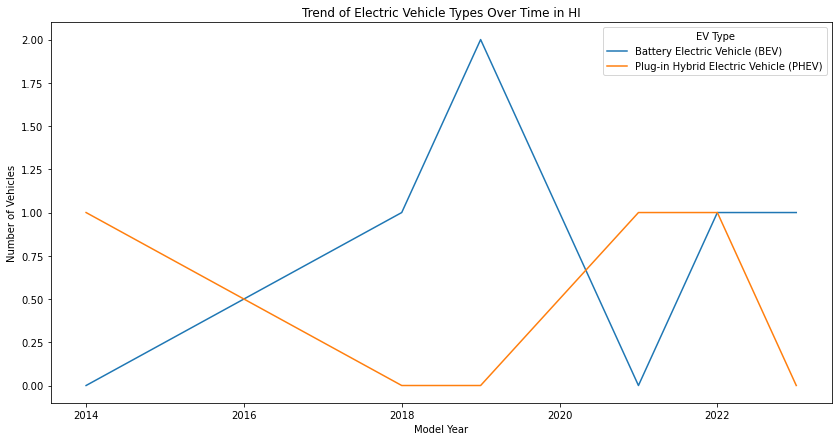

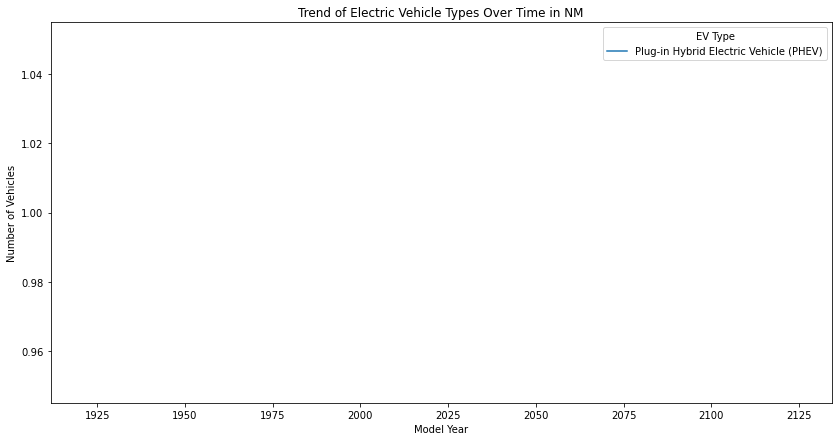

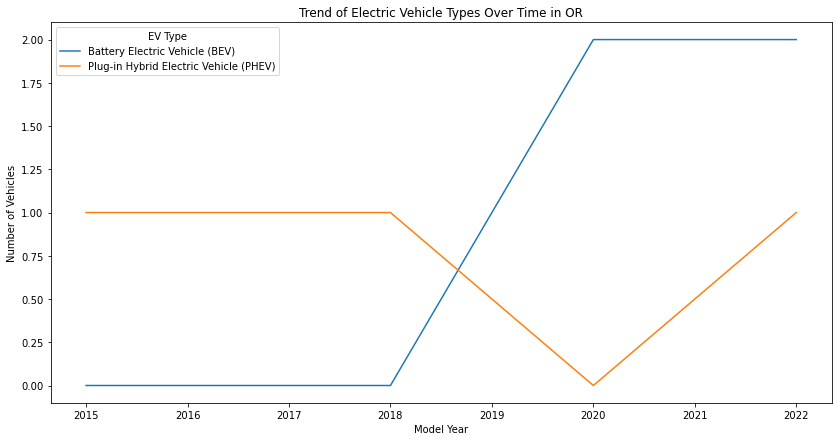

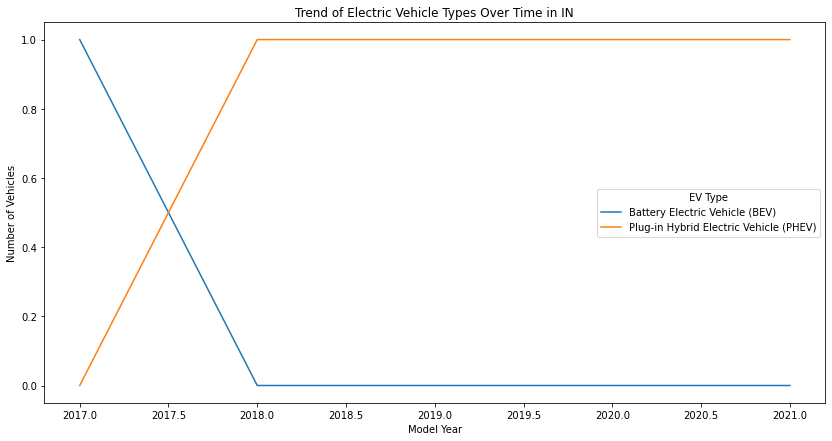

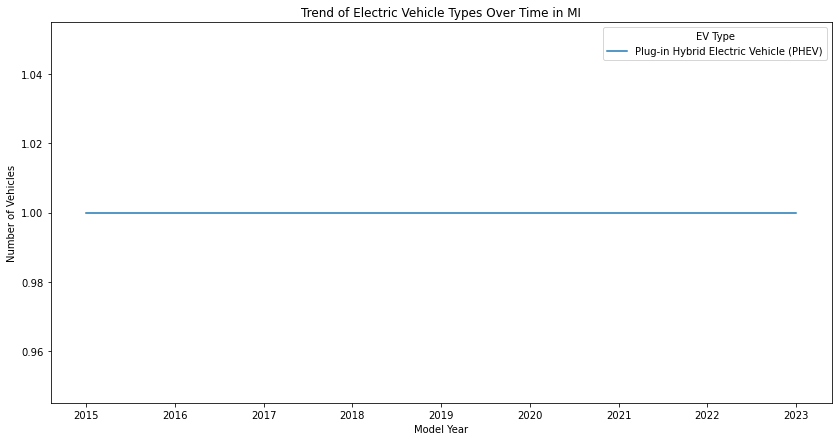

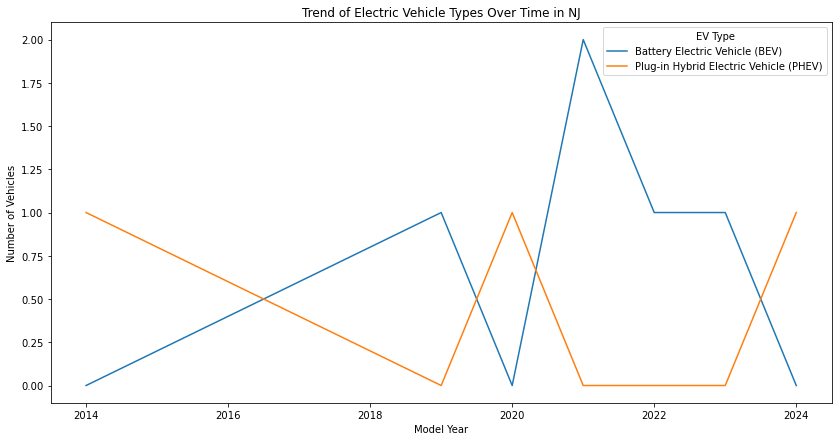

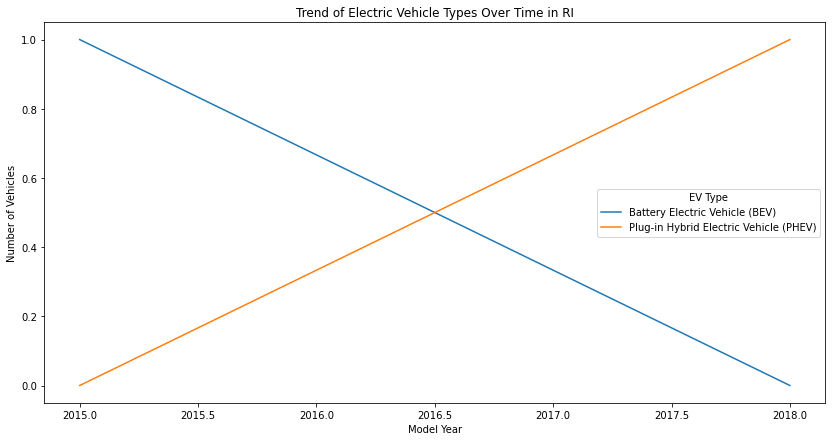

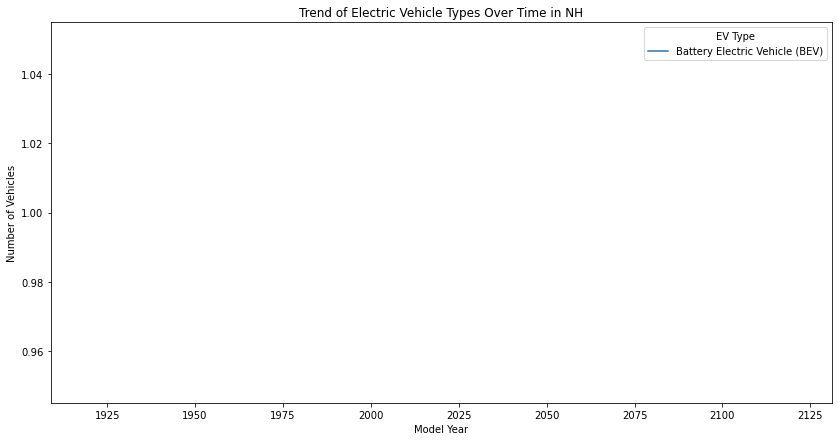

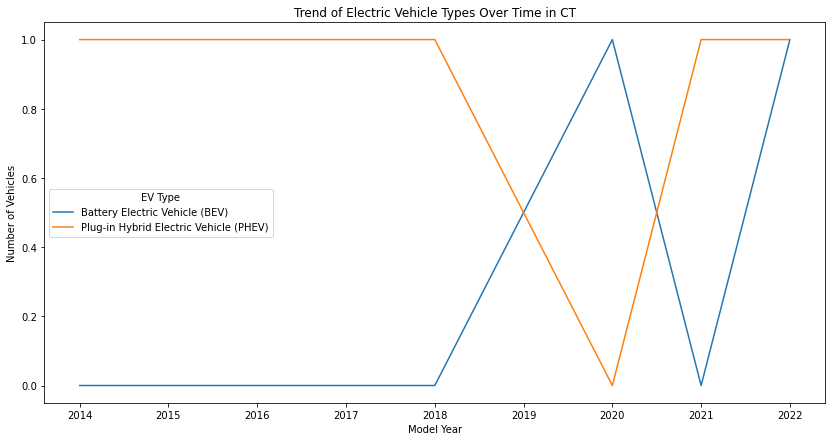

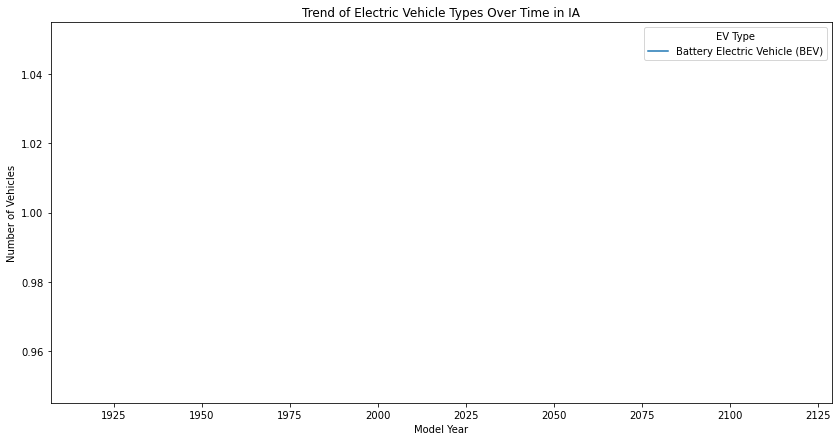

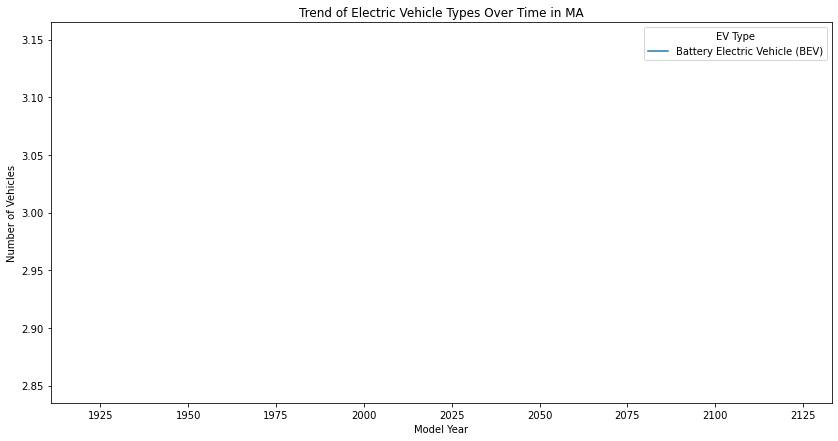

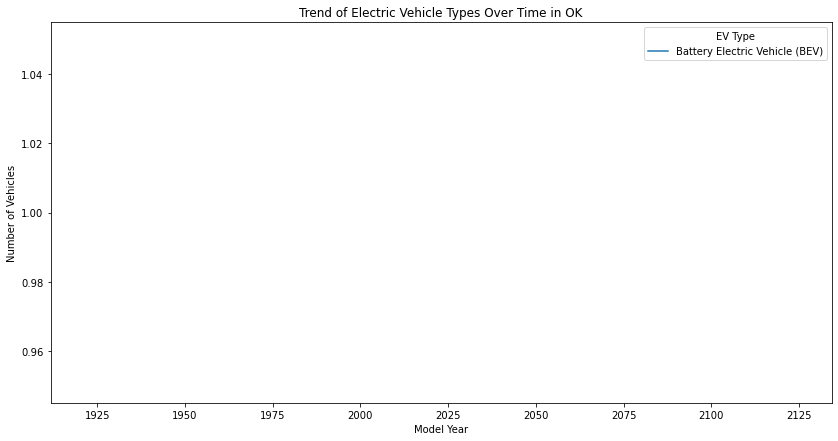

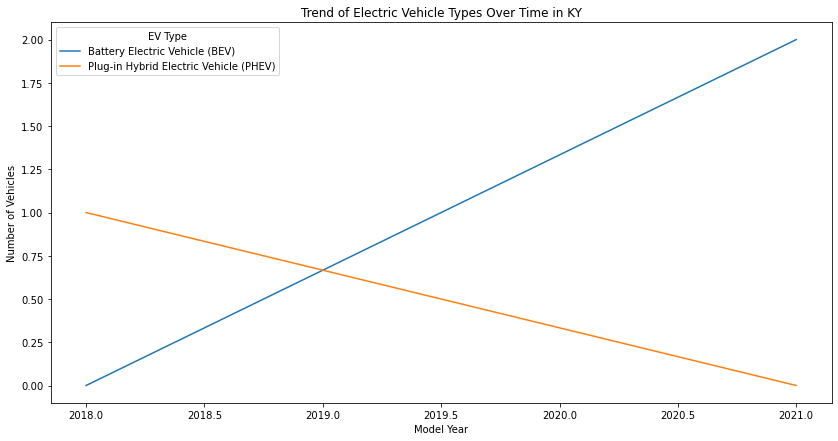

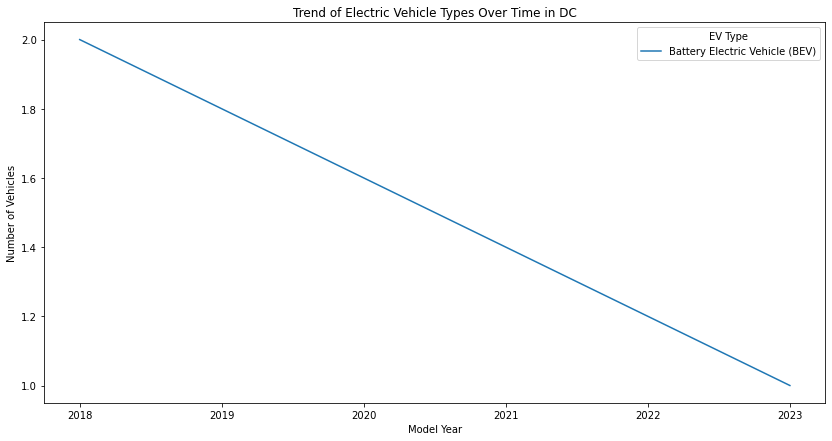

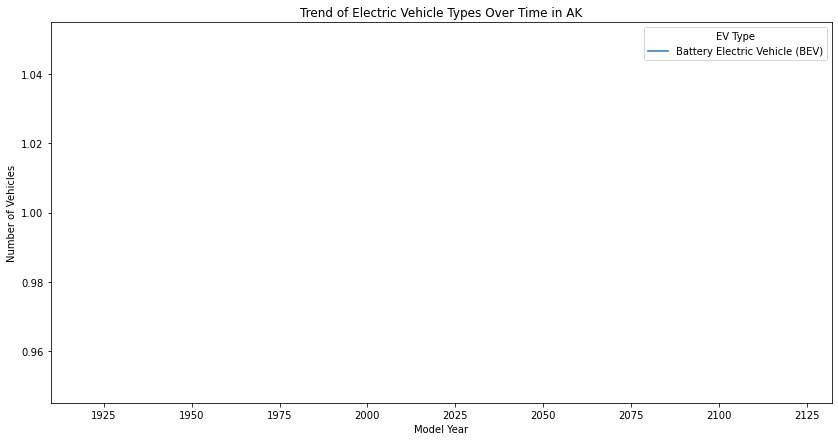

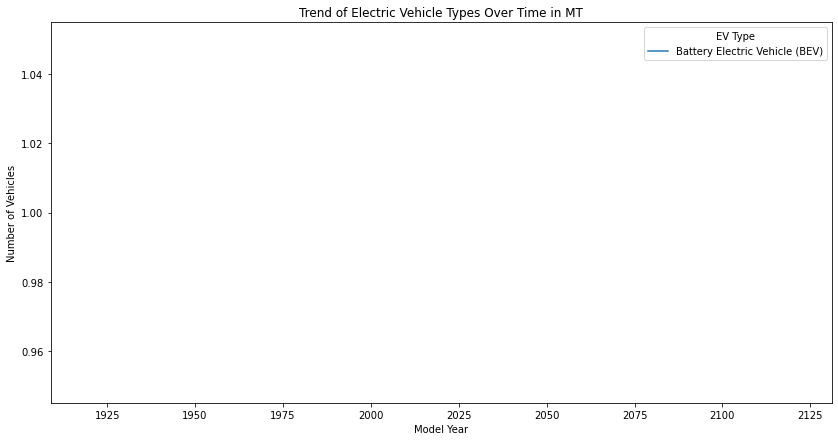

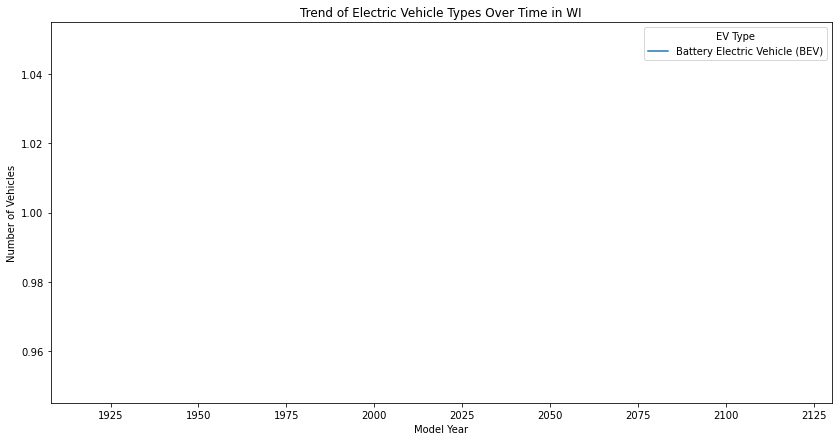

In [53]:
for state in evp['State'].unique():
    state_ev_type_trend = evp[evp['State'] == state].groupby(['Model Year', 'Electric Vehicle Type']).size().unstack().fillna(0)
    state_ev_type_trend.plot(kind='line', figsize=(14, 7))
    plt.title(f'Trend of Electric Vehicle Types Over Time in {state}')
    plt.xlabel('Model Year')
    plt.ylabel('Number of Vehicles')
    plt.legend(title='EV Type')
    plt.show()


# CORRELATION ANALYSIS

# 12. Does the Electric Vehicle Type is correlated with the Clean Alternative Fuel Vehicle (CAFV) Eligibility of the Legislative District?

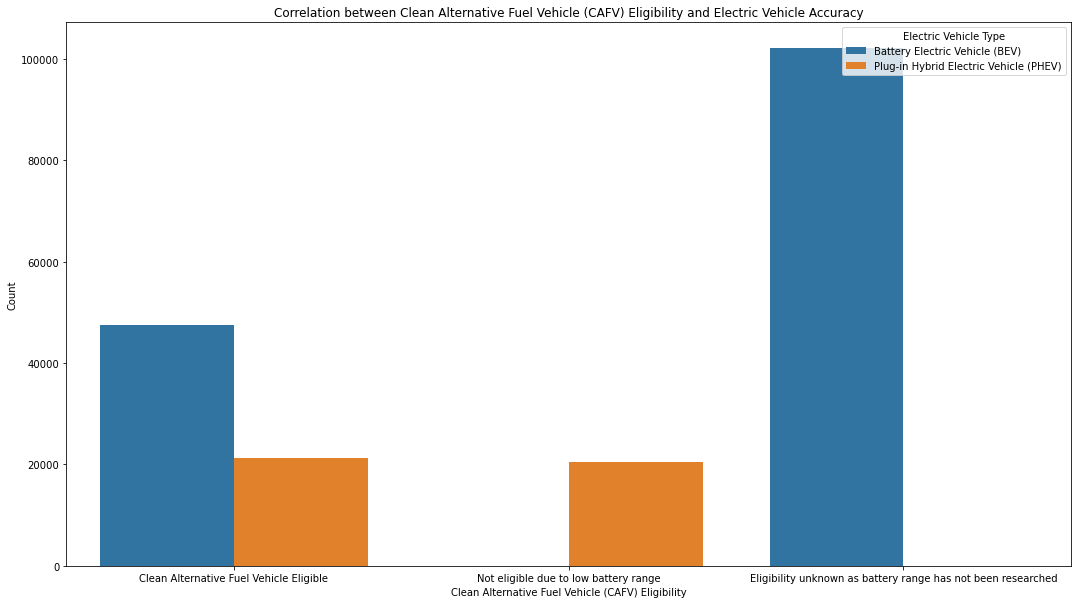

In [33]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', hue='Electric Vehicle Type', data=evp)
plt.title('Correlation between Clean Alternative Fuel Vehicle (CAFV) Eligibility and Electric Vehicle Accuracy')
plt.xlabel('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type', loc='upper right')
plt.show()

# The visual show, that is not eligible due to low battery range clean alternative fuel vehicle. The Electric Vehicle Type does not correlated with Clean Alternative Fuel Vehicle (CAFV) Eligibility.

# 13. Correlation between Electric Range and Make?

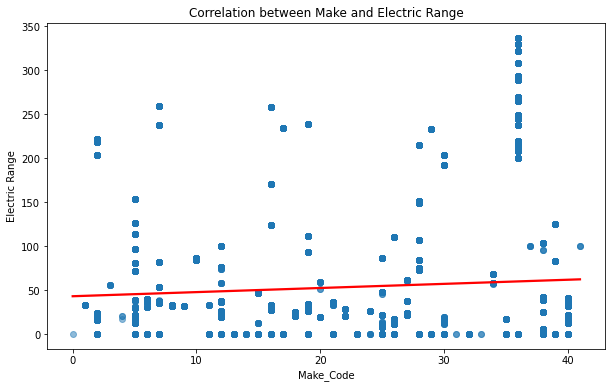

Correlation between Make and Electric Range: 0.06


In [38]:
# Encode 'Make' as numerical data if not already done
evp['Make_Code'] = evp['Make'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
sns.regplot(x='Make_Code', y='Electric Range', data=evp, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Correlation between Make and Electric Range')
plt.show()

correlation = evp['Make_Code'].corr(evp['Electric Range'])
print(f"Correlation between Make and Electric Range: {correlation:.2f}")


# 14. Correlation between Electric Range and Model Year?

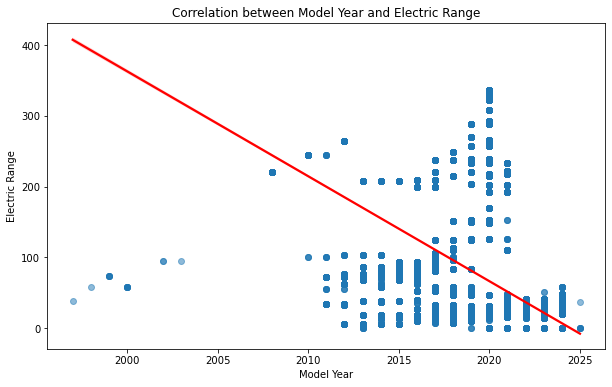

Correlation between Model Year and Electric Range: -0.49


In [42]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Model Year', y='Electric Range', data=evp, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Correlation between Model Year and Electric Range')
plt.show()

correlation = evp['Model Year'].corr(evp['Electric Range'])
print(f"Correlation between Model Year and Electric Range: {correlation:.2f}")


# 15. Does the Electric Vehicle Type is correlated with the Electric Utility?

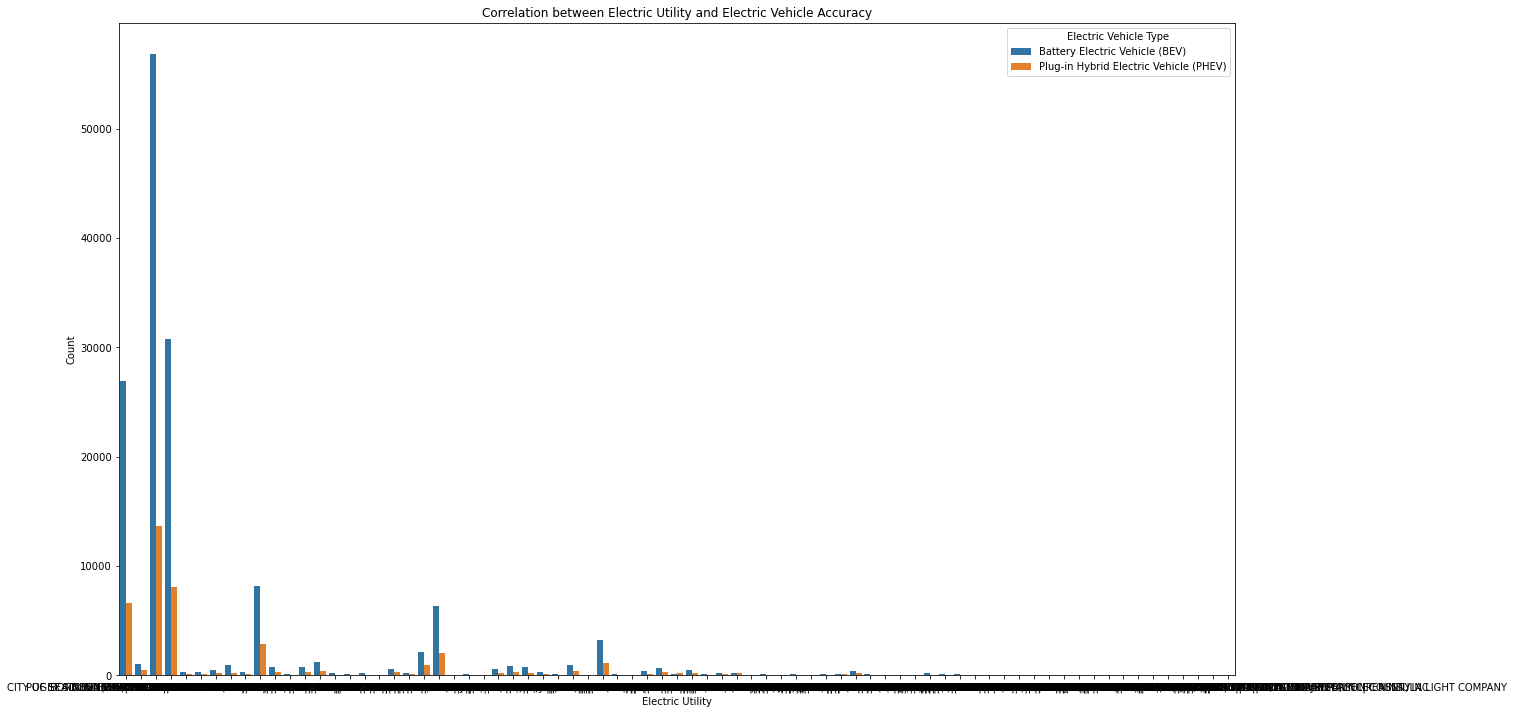

In [58]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Electric Utility', hue='Electric Vehicle Type', data=evp)
plt.title('Correlation between Electric Utility and Electric Vehicle Accuracy')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.legend(title='Electric Vehicle Type', loc='upper right')
plt.show()